In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys
sys.path.append('Desktop/Columbia%20Engineering/Project%20Uno/SK%20Project%20Folder/')
import exp

In [69]:
file = "bk_one_fam.csv"
one_fam_3years = pd.read_csv(file)
one_fam_3years = one_fam_3years.drop(columns=['Unnamed: 0', 'Unnamed: 0.1' ])
one_fam_3years.head()

,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000


# Data Analysis & Visualization

In [70]:
#Add Alphabetical School District for Plot
one_fam_3years["SchoolDist_A"] = one_fam_3years["SchoolDist"] 
one_fam_3years["SchoolDist_A"]= one_fam_3years["SchoolDist_A"].apply(str)
one_fam_3years["SchoolDist_A"] = one_fam_3years["SchoolDist_A"].replace(
    {'13.0': 'S13', '14.0': 'S14','15.0': 'S15','16.0': 'S16','17.0': 'S17','18.0': 'S18','19.0': 'S19','20.0': 'S20',
     '21.0': 'S21', '22.0': 'S22','23.0': 'S23','32.0': 'S32'})


### Scatter Plots 

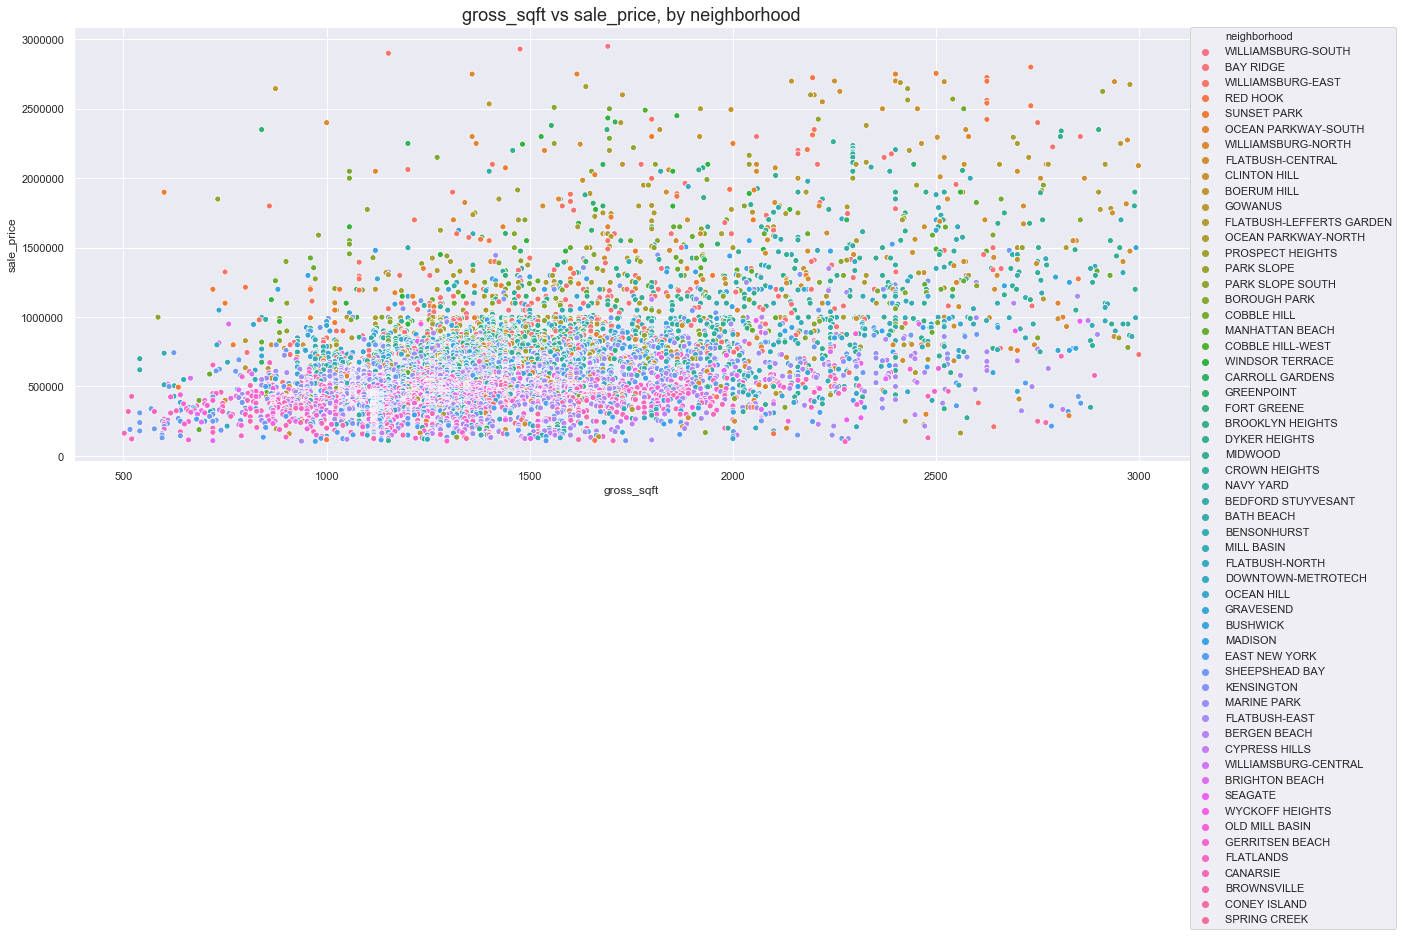

In [72]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='neighborhood', alpha=1.0)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0.)


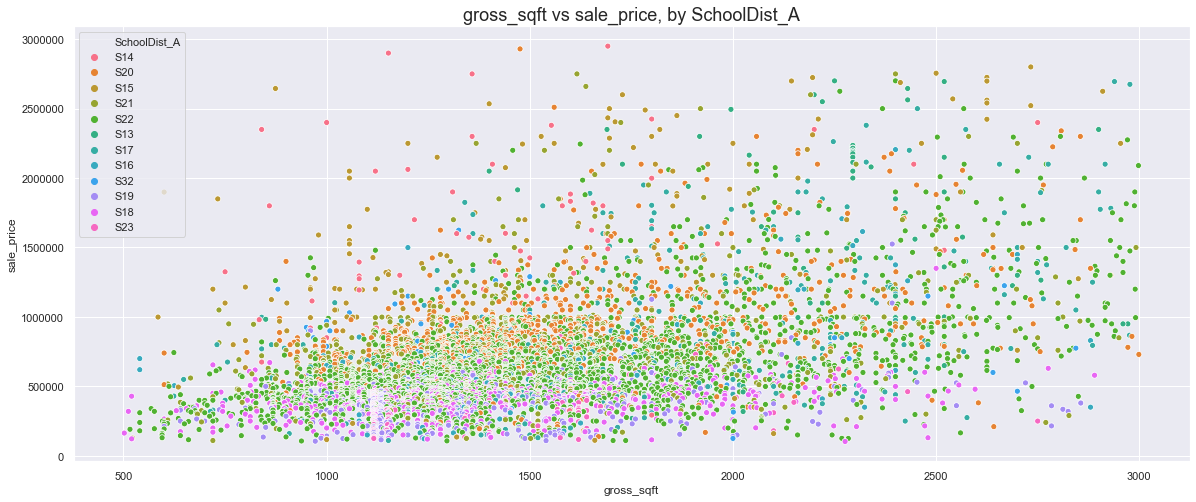

In [73]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='SchoolDist_A', alpha=1.0)

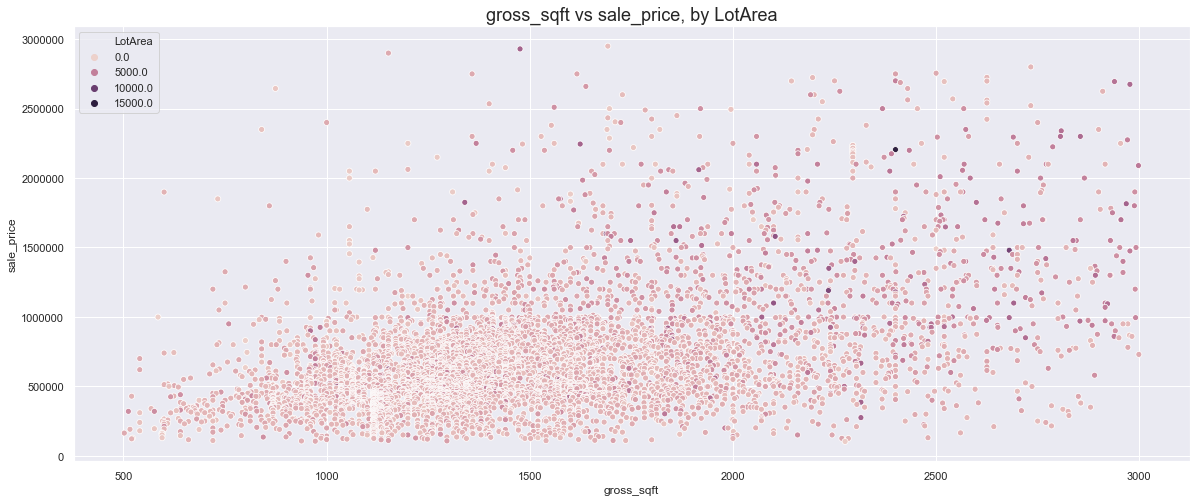

In [74]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='LotArea', alpha=0.99)

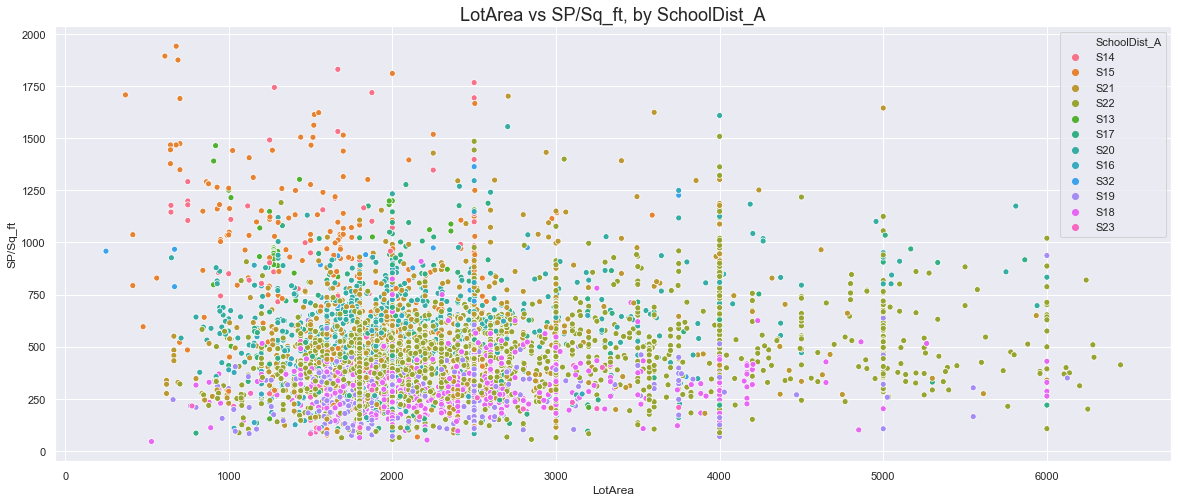

In [75]:
one_fam_3years_lot = one_fam_3years.loc[(one_fam_3years["LotArea"]<6500)&
                                    (one_fam_3years["SP/Sq_ft"] < 2000),:]
exp.plot_bivariate(one_fam_3years_lot , 'LotArea', 'SP/Sq_ft', hue='SchoolDist_A', alpha=1.0)

### The Big Picture  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


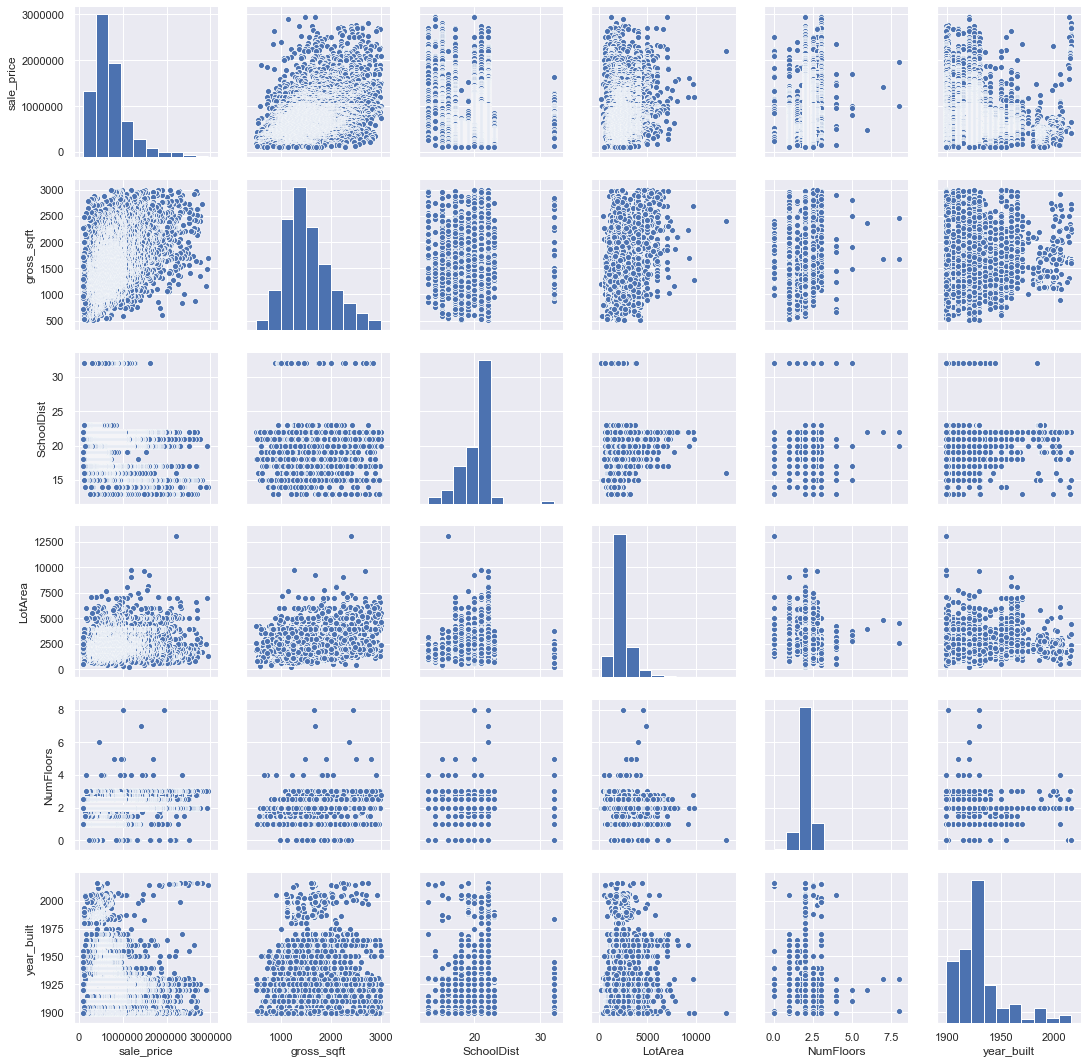

In [87]:
#scatterplot
sns.set()
cols = ['sale_price', 'gross_sqft', 
        'SchoolDist', 'LotArea', 'NumFloors', 'year_built']
sns.pairplot(one_fam_3years[cols], size = 2.5)
plt.show();

## Box Plots

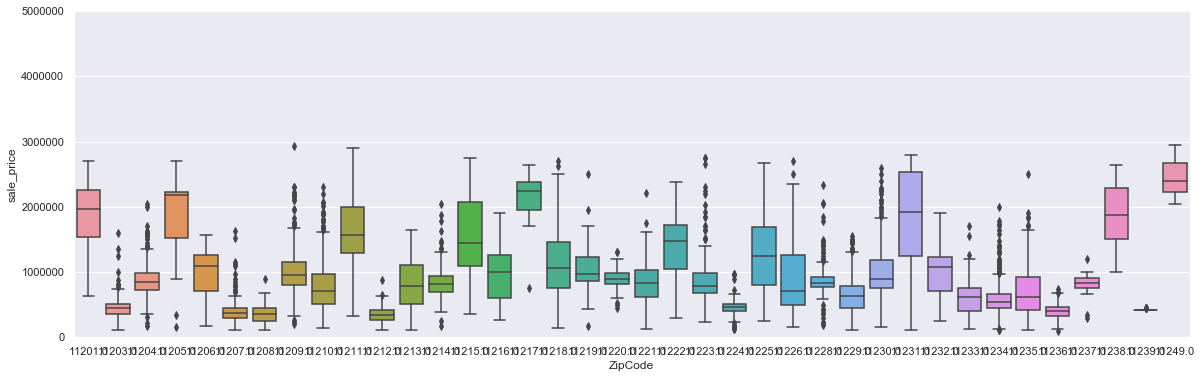

In [82]:
#box plot zipcode/saleprice
var = one_fam_3years["ZipCode"]
SP = one_fam_3years["sale_price"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=5000000);

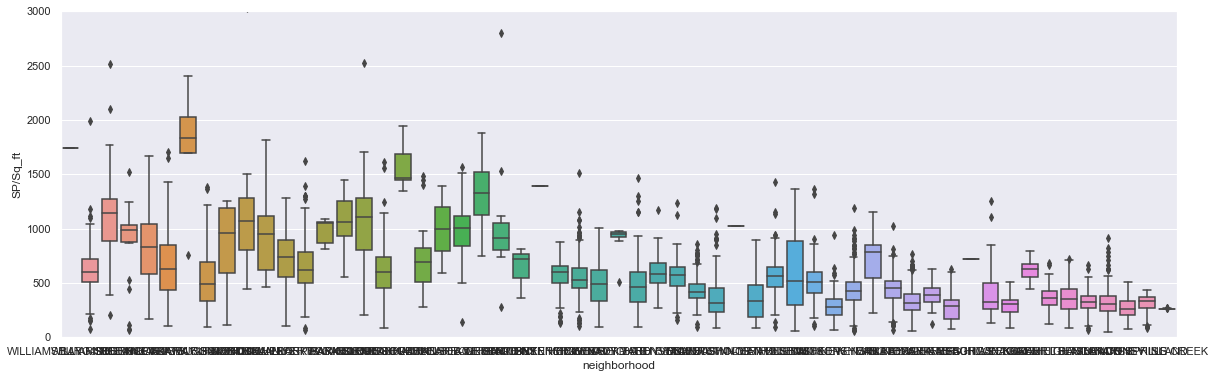

In [83]:
#box plot Neighbourhood vs SP/sq.ft
var = one_fam_3years["neighborhood"]
SP = one_fam_3years["SP/Sq_ft"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3000);

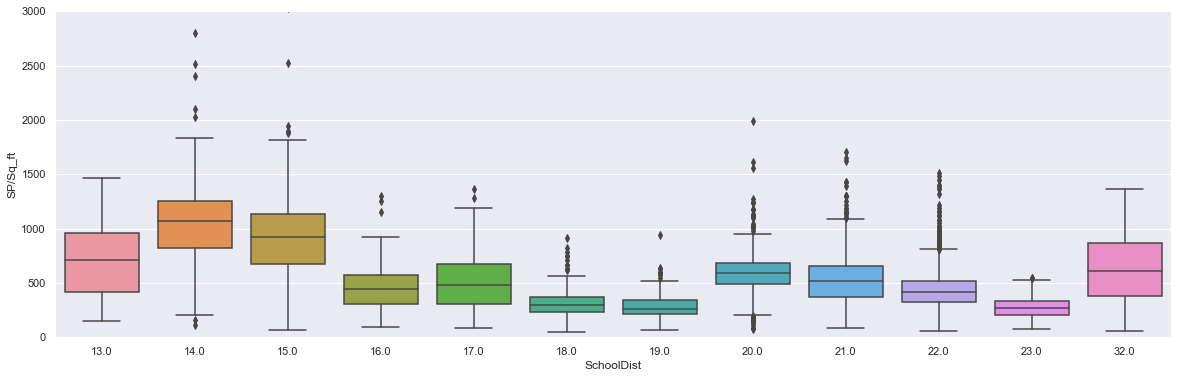

In [84]:
#box plot School Dist vs SP/sq.ft
var = one_fam_3years["SchoolDist"]
SP = one_fam_3years["SP/Sq_ft"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3000);

### Heat Maps

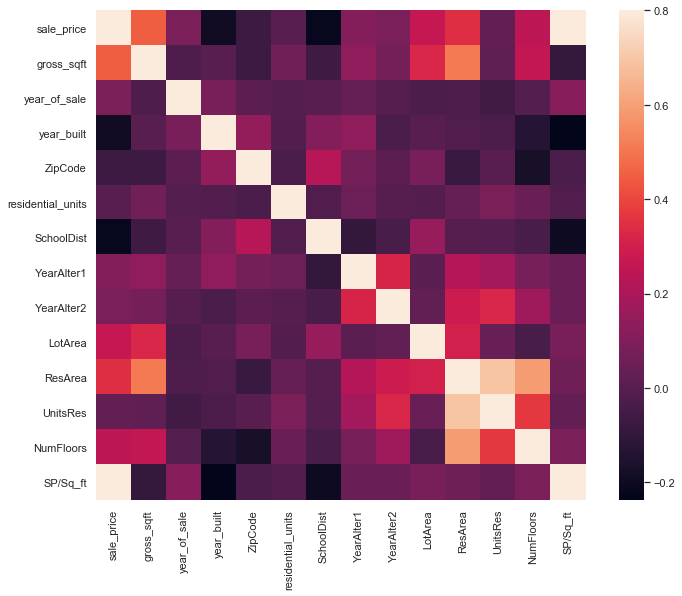

In [85]:
#correlation matrix
corrmat = one_fam_3years.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

sale_price      1.000000
SP/Sq_ft        0.799992
gross_sqft      0.448373
ResArea         0.345071
LotArea         0.265926
NumFloors       0.246375
SchoolDist     -0.219224
year_built     -0.189676
YearAlter1      0.110347
year_of_sale    0.089693
Name: sale_price, dtype: float64

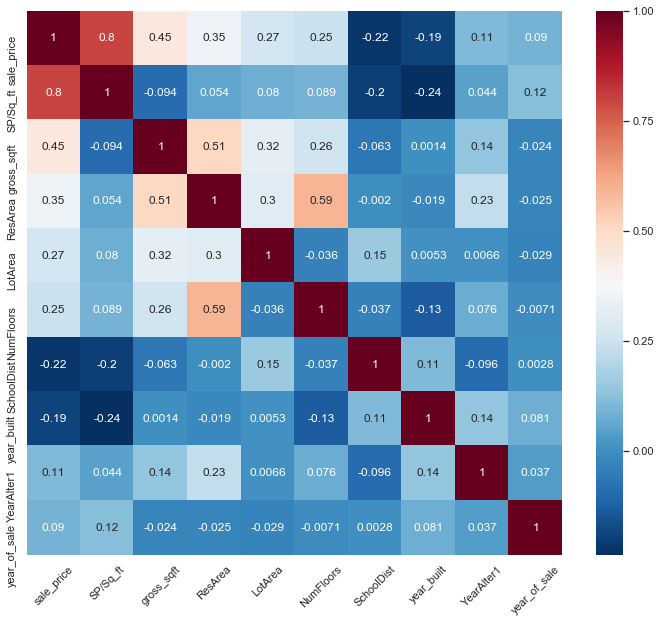

In [86]:
#one_fam_3years_f = one_fam_3years.astype(float)
exp.plot_correlations(one_fam_3years, 'sale_price', limit=10, annot=True)

In [88]:
print("Find most important features relative to target")
corr = one_fam_3years.corr()
corr.sort_values(["sale_price"], ascending = False, inplace = True)
print(corr.sale_price)

Find most important features relative to target
sale_price           1.000000
SP/Sq_ft             0.799992
gross_sqft           0.448373
ResArea              0.345071
LotArea              0.265926
NumFloors            0.246375
YearAlter1           0.110347
year_of_sale         0.089693
YearAlter2           0.086384
UnitsRes             0.029900
residential_units    0.001934
ZipCode             -0.070386
year_built          -0.189676
SchoolDist          -0.219224
Name: sale_price, dtype: float64


# Linear Regression 


### Define Datasets 

In [90]:
#Combined Dataset
dfcombine = one_fam_3years
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)


#Target Dataset
dfy = pd.DataFrame(one_fam_3years["sale_price"])

#all the independant variables/predictors are named as dfx
dfxx = dfcombine.drop(columns=['building_class_category', 'sale_price',
                              'year_of_sale', 'SchoolDist_A', 'SP/Sq_ft'])
dfx = dfxx.drop(columns=['ZipCode', 'neighborhood',
                              'residential_units', 'SchoolDist', 'BldgClass', 'UnitsRes'])
dfx.head()

,gross_sqft,year_built,YearAlter1,YearAlter2,LotArea,ResArea,NumFloors
0,1692.0,2014,2013.0,0.0,1279.0,1692.0,3.0
1,1476.0,1920,0.0,0.0,7000.0,1476.0,2.0
2,1152.0,1920,2006.0,0.0,2500.0,1152.0,3.0
3,2733.0,2016,0.0,0.0,1752.0,2733.0,3.0
4,2500.0,1901,2015.0,0.0,2504.0,2500.0,3.0


### Analysis of combined dataset 

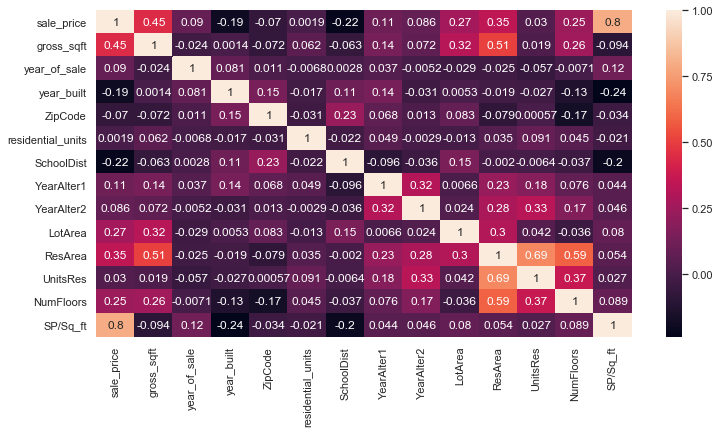

In [91]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)

### Train Set  - Simple Regression Resumed 

In [95]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.head()

,sale_price
0,2950000.0
1,2930000.0
2,2900000.0
3,2800187.0
4,2755000.0


In [96]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split

#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [97]:
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

linR = LinearRegression()
linR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.27818334996621163

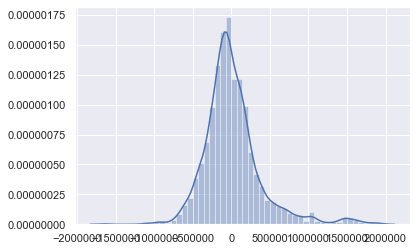

In [99]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

In [100]:
dfx.shape

(6079, 7)

In [101]:
oness = np.ones((6079,1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])
dfxnew = dfone.join(dfx)
dfxnew.head()

,ones,gross_sqft,year_built,YearAlter1,YearAlter2,LotArea,ResArea,NumFloors
0,1,1692.0,2014,2013.0,0.0,1279.0,1692.0,3.0
1,1,1476.0,1920,0.0,0.0,7000.0,1476.0,2.0
2,1,1152.0,1920,2006.0,0.0,2500.0,1152.0,3.0
3,1,2733.0,2016,0.0,0.0,1752.0,2733.0,3.0
4,1,2500.0,1901,2015.0,0.0,2504.0,2500.0,3.0


In [102]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm


In [103]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfxnew).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     331.3
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:46:39   Log-Likelihood:                -86548.
No. Observations:                6079   AIC:                         1.731e+05
Df Residuals:                    6071   BIC:                         1.732e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        6.299e+06   3.94e+05     15.990      0.000    5.53e+06    7.07e+06
gross_sqft   314.3052     11.986     26.223      0.000     290.809     337.802
year_built -3348.6742    201.876    -16.588      0.000   -3744.423   -2952.926
YearAlter1    64.5866     10.922      5.913      0.000      43.175      85.998
YearAlter2    -2.2526     32.656     -0.069      0.945     -66.270      61.764
LotArea       66.3401      5.552     11.948      0.000      55.455      77.225
ResArea       32.3039     12.190      2.650      0.008       8.406      56.201
NumFloors   1.009e+05   1.36e+04      7.434      0.000    7.43e+04    1.27e+05
==============================================================================
Omnibus:                     1930.394   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8318.641
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                       7.883   Cond. No.                     3.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RMSE Model with Plot

In [50]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 365187.2220040427
RMSE on Test set : 378040.5193638116


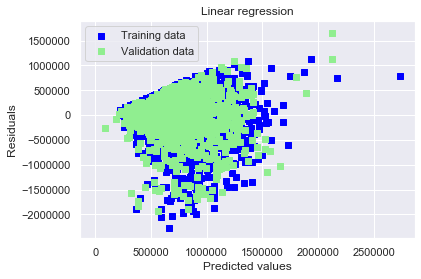

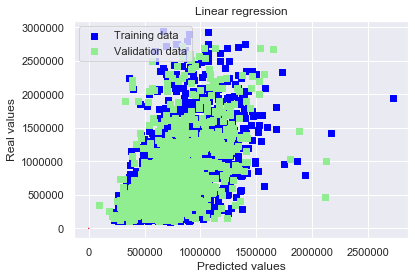

In [54]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

### Once More Run - with fewer variables

In [105]:
dfx2 = dfxnew.drop(['YearAlter1','YearAlter2'], axis = 1)
dfx2.head()

,ones,gross_sqft,year_built,LotArea,ResArea,NumFloors
0,1,1692.0,2014,1279.0,1692.0,3.0
1,1,1476.0,1920,7000.0,1476.0,2.0
2,1,1152.0,1920,2500.0,1152.0,3.0
3,1,2733.0,2016,1752.0,2733.0,3.0
4,1,2500.0,1901,2504.0,2500.0,3.0


In [106]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx2).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     453.6
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:47:12   Log-Likelihood:                -86567.
No. Observations:                6079   AIC:                         1.731e+05
Df Residuals:                    6073   BIC:                         1.732e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        5.982e+06   3.91e+05     15.301      0.000    5.22e+06    6.75e+06
gross_sqft   317.2118     11.965     26.511      0.000     293.756     340.668
year_built -3183.1280    200.216    -15.898      0.000   -3575.623   -2790.633
LotArea       63.1078      5.541     11.389      0.000      52.245      73.971
ResArea       47.3350     11.736      4.033      0.000      24.329      70.341
NumFloors   9.444e+04   1.36e+04      6.960      0.000    6.78e+04    1.21e+05
==============================================================================
Omnibus:                     1976.456   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8722.510
Skew:                           1.531   Prob(JB):                         0.00
Kurtosis:                       8.007   Cond. No.                     3.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

0.2787506372307691

## Next Steps - Normalisation

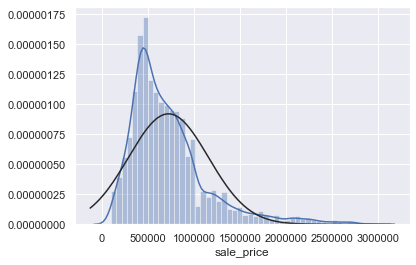

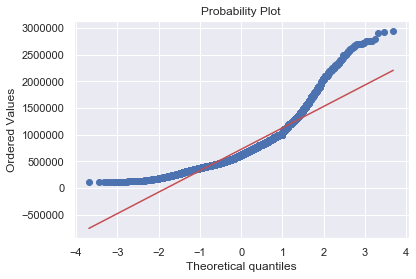

In [48]:
#histogram and normal probability plot
sns.distplot(one_fam_3years['sale_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(one_fam_3years['sale_price'], plot=plt)

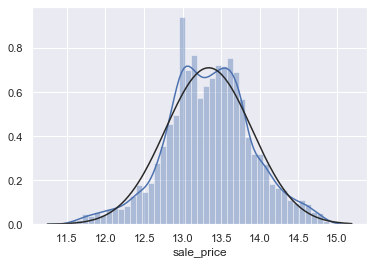

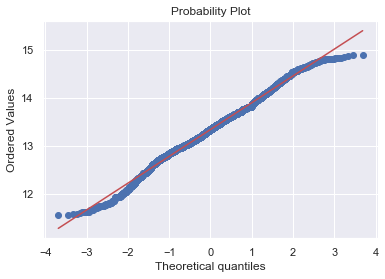

In [49]:
#applying log transformation
y_lg = np.log(one_fam_3years['sale_price'])

#transformed histogram and normal probability plot
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)

## Work In Progress / Backups

In [32]:
## Attempt: Convert Neighbourhoods to Numeric and work meaningful correlation 
# Rename Neighborhoods to Numeric
nbh1 = pd.DataFrame(dfcombine['neighborhood'].value_counts())
#nbh = nbh.set_index("neighborhood")
nbh1.reset_index()
#nbh["nb_code"] = nbh.index
nbh1.reset_index()

nbh1.reset_index(inplace=True, drop=False)
nbh1 = nbh1.rename(columns={"index":"Name", "neighborhood": "Count"})
nbh1.reset_index(inplace=True, drop=False)
nbh1 = nbh1.rename(columns={"index":"code"})
#nbh['Name'] = pd.factorize(nbh.Name)[0] +1 

nbh1.head()


,code,Name,Count
0,0,FLATBUSH-EAST,547
1,1,MARINE PARK,478
2,2,BAY RIDGE,327
3,3,CANARSIE,306
4,4,MIDWOOD,284


In [92]:
#add dummy variables to dfcombine to work out correlation... 
dfcombine['nbh_dum'] = dfcombine['neighborhood'] 
dfcombine['nbh_dum'] = pd.factorize(dfcombine.nbh_dum)[0] +1 
dfcombine['bldcl_dum'] = dfcombine['BldgClass'] 
dfcombine['bldcl_dum'] = pd.factorize(dfcombine.bldcl_dum)[0] +1 
dfcombine.head()

,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft,SchoolDist_A,nbh_dum,bldcl_dum
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818,S14,1,1
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851,S20,2,2
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111,S14,3,1
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608,S15,4,1
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000,S15,5,1


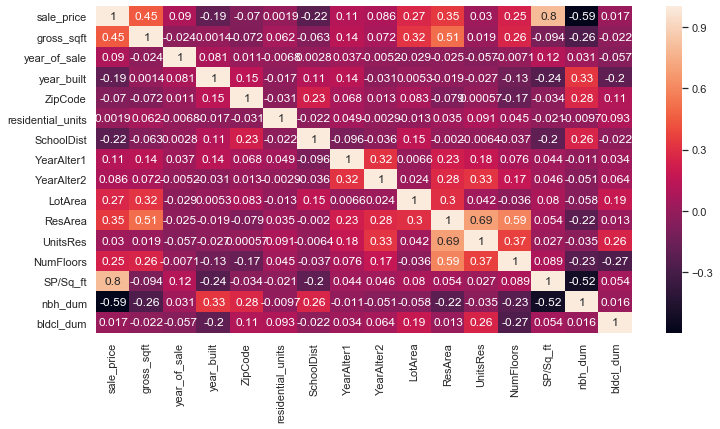

In [93]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)

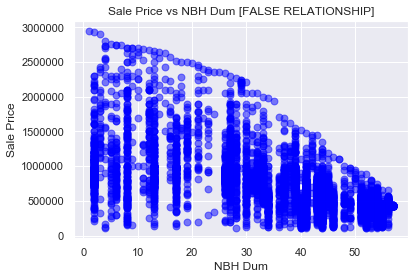

In [94]:
# Sale Price vs neighbourhood (dummy / factored) - Gives Inaccurate relationship due to improper treatment of categorical  
#READ : The Search for Categorical Correlation > https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
N = len(dfcombine)
x = dfcombine['nbh_dum']
y = dfcombine['sale_price']
colors = ("blue")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Sale Price vs NBH Dum [FALSE RELATIONSHIP]')
plt.xlabel('NBH Dum')
plt.ylabel('Sale Price')
plt.show()


In [79]:
one_fam_3years['sale_price'].describe()

count    6.079000e+03
mean     7.250200e+05
std      4.337171e+05
min      1.030000e+05
25%      4.350000e+05
50%      6.230000e+05
75%      8.880000e+05
max      2.950000e+06
Name: sale_price, dtype: float64